# Missing Values Handling

1. **Remove Missing Values** - This approach is known as complete case analysis (CCA)
2. **Impute**

   2.1.0. Uivariate Impute (Numerical)
    1. Mean/Median
    2. Random Value
    3. End of Distribution 
    
   2.1.1. Uivariate Impute (Categorical)
    1. Mode
    2. Relace with word (Missing)
    
   2.2. Bivariate Impute
    1. KNN Impute  
    2. Iterative impute

### Remove Missing Values (CCA Technique)
- We should use CCA Technique.
1. when the data is completely MCAR (Missing Completely at Random)
2. if the missing data is less than 5% of the data.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_science_job.csv')
data.shape

(19158, 13)

In [3]:
df = data.copy()

In [4]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

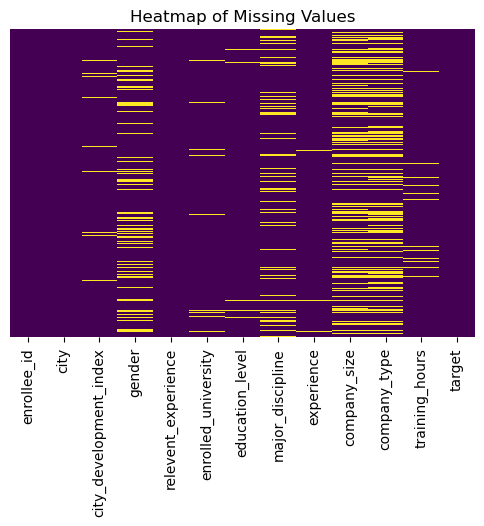

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [31]:
missing_props = df.isnull().mean() * 100
filtered_cols = missing_props[(missing_props > 0) & (missing_props < 5) | (missing_props > 95)]
for col, prop in filtered_cols.items():
    category = "very low missing values" if prop < 5 else 'very high proportion of missing values'
    print(f"{col} - {prop:.2f}%" , " - ", category) 

city_development_index - 2.50%  -  very low missing values
enrolled_university - 2.01%  -  very low missing values
education_level - 2.40%  -  very low missing values
experience - 0.34%  -  very low missing values
training_hours - 4.00%  -  very low missing values


In [39]:
cols = filtered_cols.index.to_list()

In [44]:
df[cols]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [52]:
# after dropping the data in cols which is missing data < 5% of the complete data, how much data will be remaining.
print(round(len(df[cols].dropna())/len(df), 2)*100,"% data remains")

90.0 % data remains


In [53]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

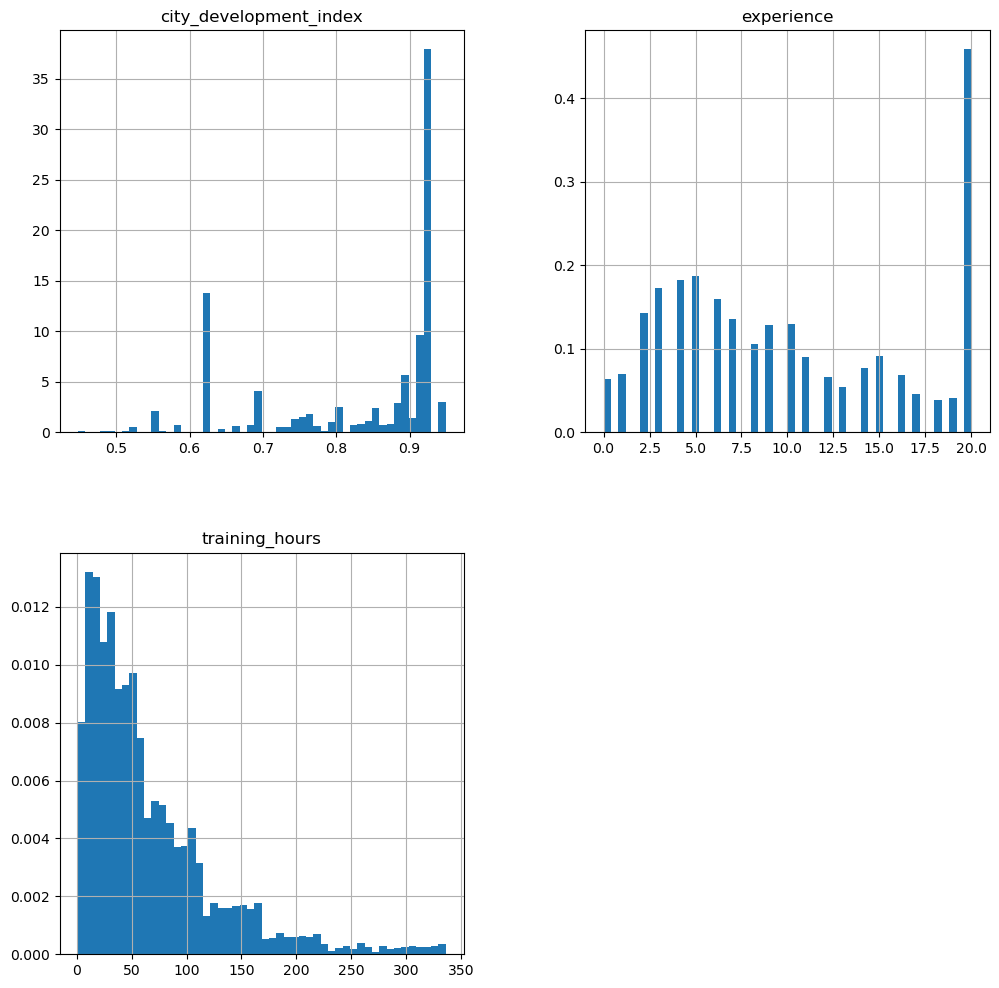

In [54]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

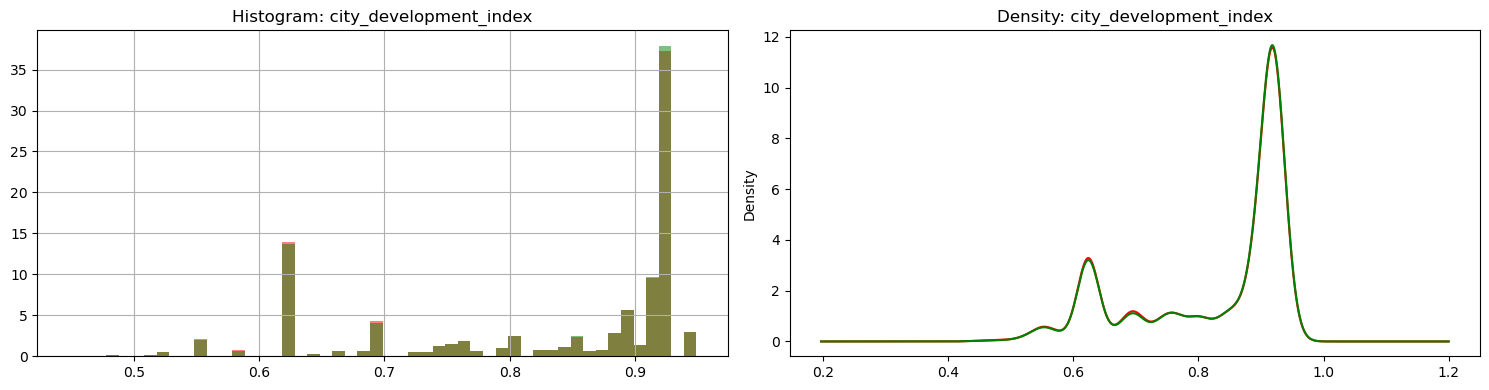

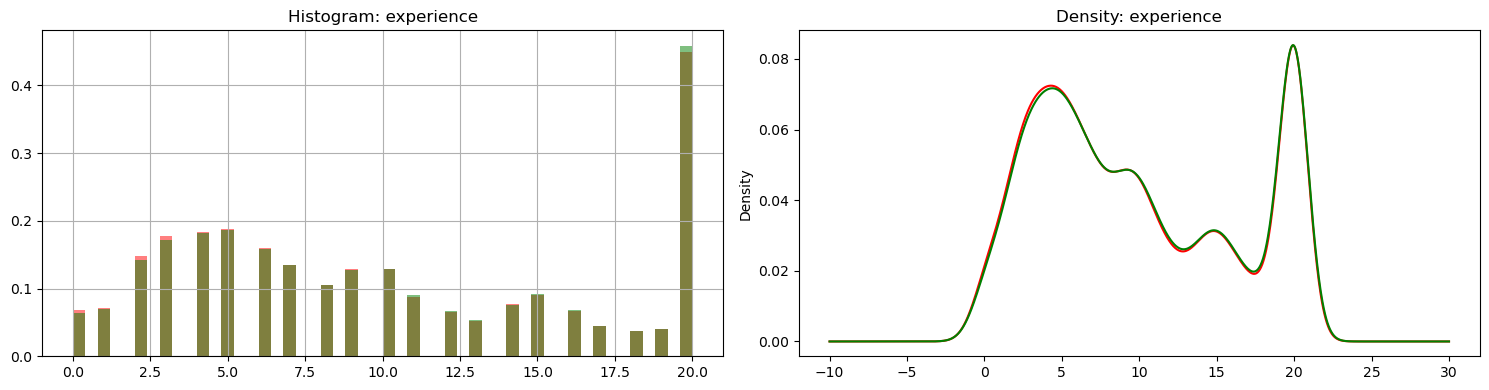

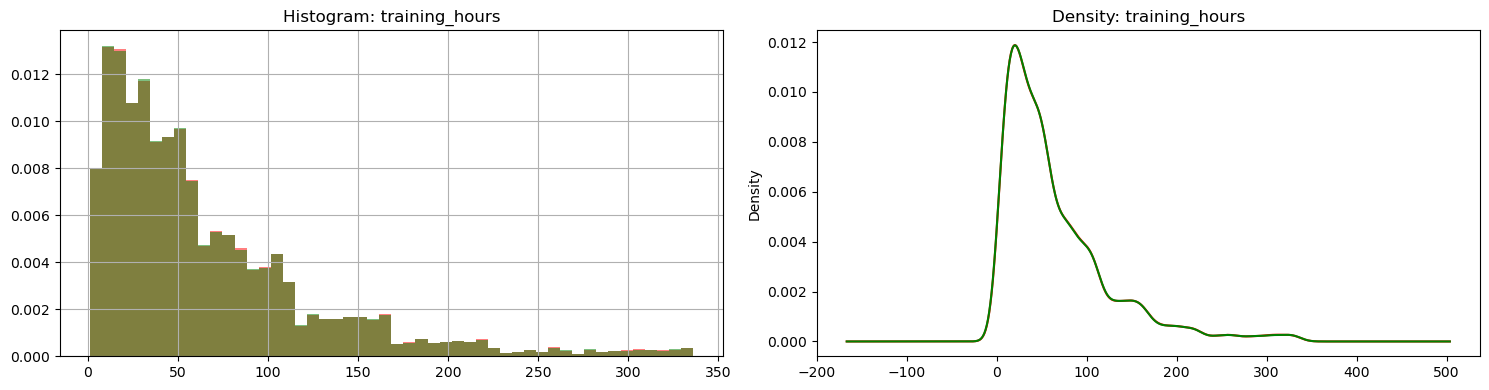

In [67]:
numeric_cols = df[cols].select_dtypes(include=['number']).columns

for col in numeric_cols:
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    df[col].hist(ax=ax[0], bins=50, density=True, color='red', alpha=0.5)
    new_df[col].hist(ax=ax[0], bins=50, density=True, color='green', alpha=0.5)
    ax[0].set_title(f'Histogram: {col}')
    
    
    df[col].plot.kde(ax=ax[1], color='red')
    new_df[col].plot.kde(ax=ax[1], color='green')
    ax[1].set_title(f'Density: {col}')
    
    plt.tight_layout()
    plt.show()

- The ratio for all the numerical columns before and after the CCA are almost identical therefore we can say that we still have the data in its orignal shape our CCA is successful.

In [68]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [69]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


- The ratio for both the categorical columns before and after the CCA are almost identical therefore we can say that we still have the data in its orignal shape our CCA is successful.